In [4]:
import pandas as pd
import os

# Step 1: Read list of file paths from a text file

file_paths_txt = '/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/csv_paths.txt'

# Read the text file containing paths to CSV files
file_paths = []
with open(file_paths_txt, "r") as file:
    file_paths = file.readlines()
file_paths = [path.strip() for path in file_paths]  # Remove leading/trailing whitespaces

# Initialize a dictionary to store connections count for each subject
connections_dict = {}

# Process each CSV file
for file_path in file_paths:
    # Extract subject ID from the file name
    sub_id = os.path.basename(file_path).split('_')[0]
    
    # Load the CSV file without header
    df = pd.read_csv(file_path, index_col=None, header=None)  # No header specified
    
    # Count the number of connections (non-zero entries) for each node
    connections_count = df.astype(bool).sum()  # Count non-zero entries for each column/node
    
    # Update the connections dictionary for this subject
    connections_dict[sub_id] = connections_count.values  # Store the values array instead of Series

# Create a DataFrame from the connections count dictionary
connections_df = pd.DataFrame.from_dict(connections_dict, orient='index')

# Transpose the DataFrame
connections_df_transposed = connections_df.T
connections_df_transposed.sort_index(axis=1, inplace=True)
connections_df_transposed.index = range(1, len(connections_df_transposed) + 1)

# Save the DataFrame to a TSV file
output_tsv_file = "/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_num_connections.tsv"
connections_df_transposed.to_csv(output_tsv_file, sep='\t', index_label='nodes')

In [3]:
import pandas as pd
import os

# Path to the text file containing paths to CSV files for each subject
file_paths_txt = '/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/csv_paths.txt'

# Read the text file containing paths to CSV files
file_paths = []
with open(file_paths_txt, "r") as file:
    file_paths = file.readlines()
file_paths = [path.strip() for path in file_paths]  # Remove leading/trailing whitespaces

# Initialize a dictionary to store sums for each subject
sums_dict = {}

# Process each CSV file
for file_path in file_paths:
    # Extract subject ID from the file name
    sub_id = os.path.basename(file_path).split('_')[0]
    
    # Load the CSV file without header and without specifying index column
    df = pd.read_csv(file_path, header=None)  # No header specified
    
    # Sum the entries along the rows and round to the second decimal place
    row_sums = df.sum(axis=1).round(3)
    
    # Update the sums dictionary for this subject
    sums_dict[sub_id] = row_sums.values  # Store the values array instead of Series

# Create a DataFrame from the sums dictionary
sums_df = pd.DataFrame.from_dict(sums_dict, orient='index')

# Transpose the DataFrame
sums_df_transposed = sums_df.T
sums_df_transposed.sort_index(axis=1, inplace=True)

# Reset the index starting from 1 for the nodes
sums_df_transposed.index = range(1, len(sums_df_transposed) + 1)

output_tsv_file = "/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_strength_connections.tsv"
sums_df_transposed.to_csv(output_tsv_file, sep='\t', index_label='nodes')

In [ ]:
## Plotting of num connections

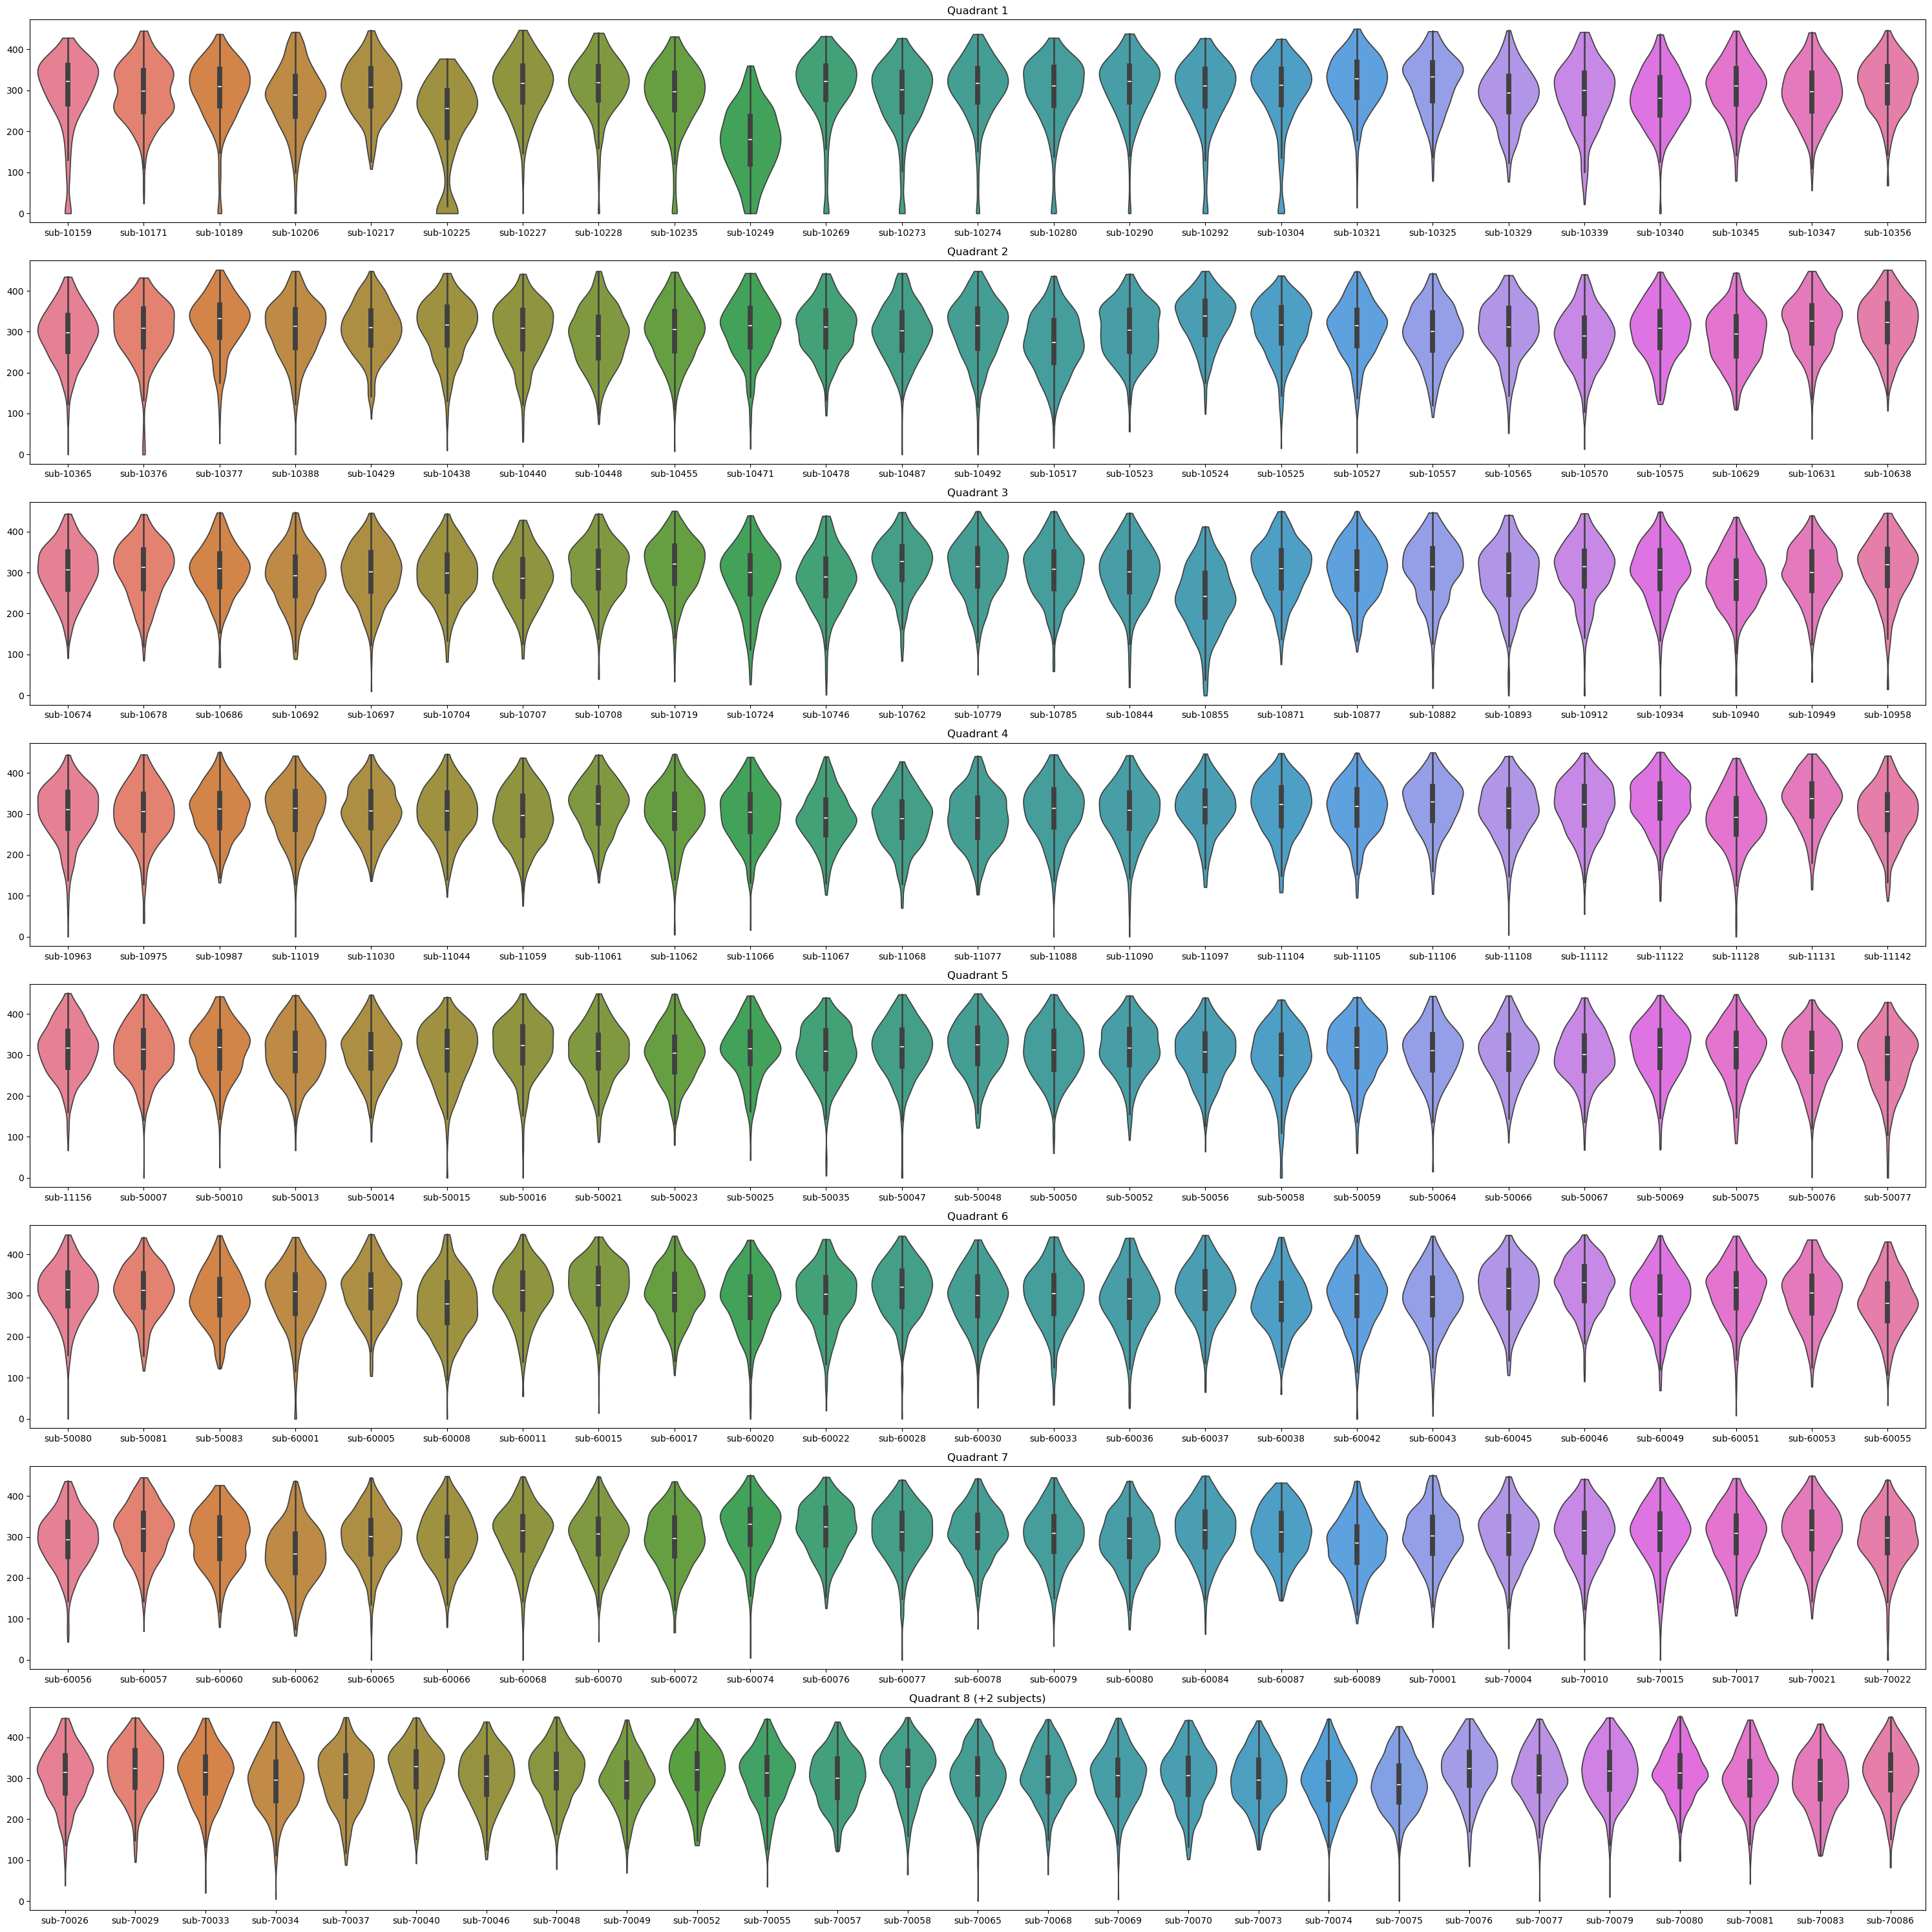

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_num_connections.tsv", sep='\t')
vols = vols.set_index('nodes')
vols = vols.reindex(sorted(vols.columns), axis=1)

# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(30, 30))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots} (+{subjects_remaining} subjects)')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
## Plotting of strength of connections

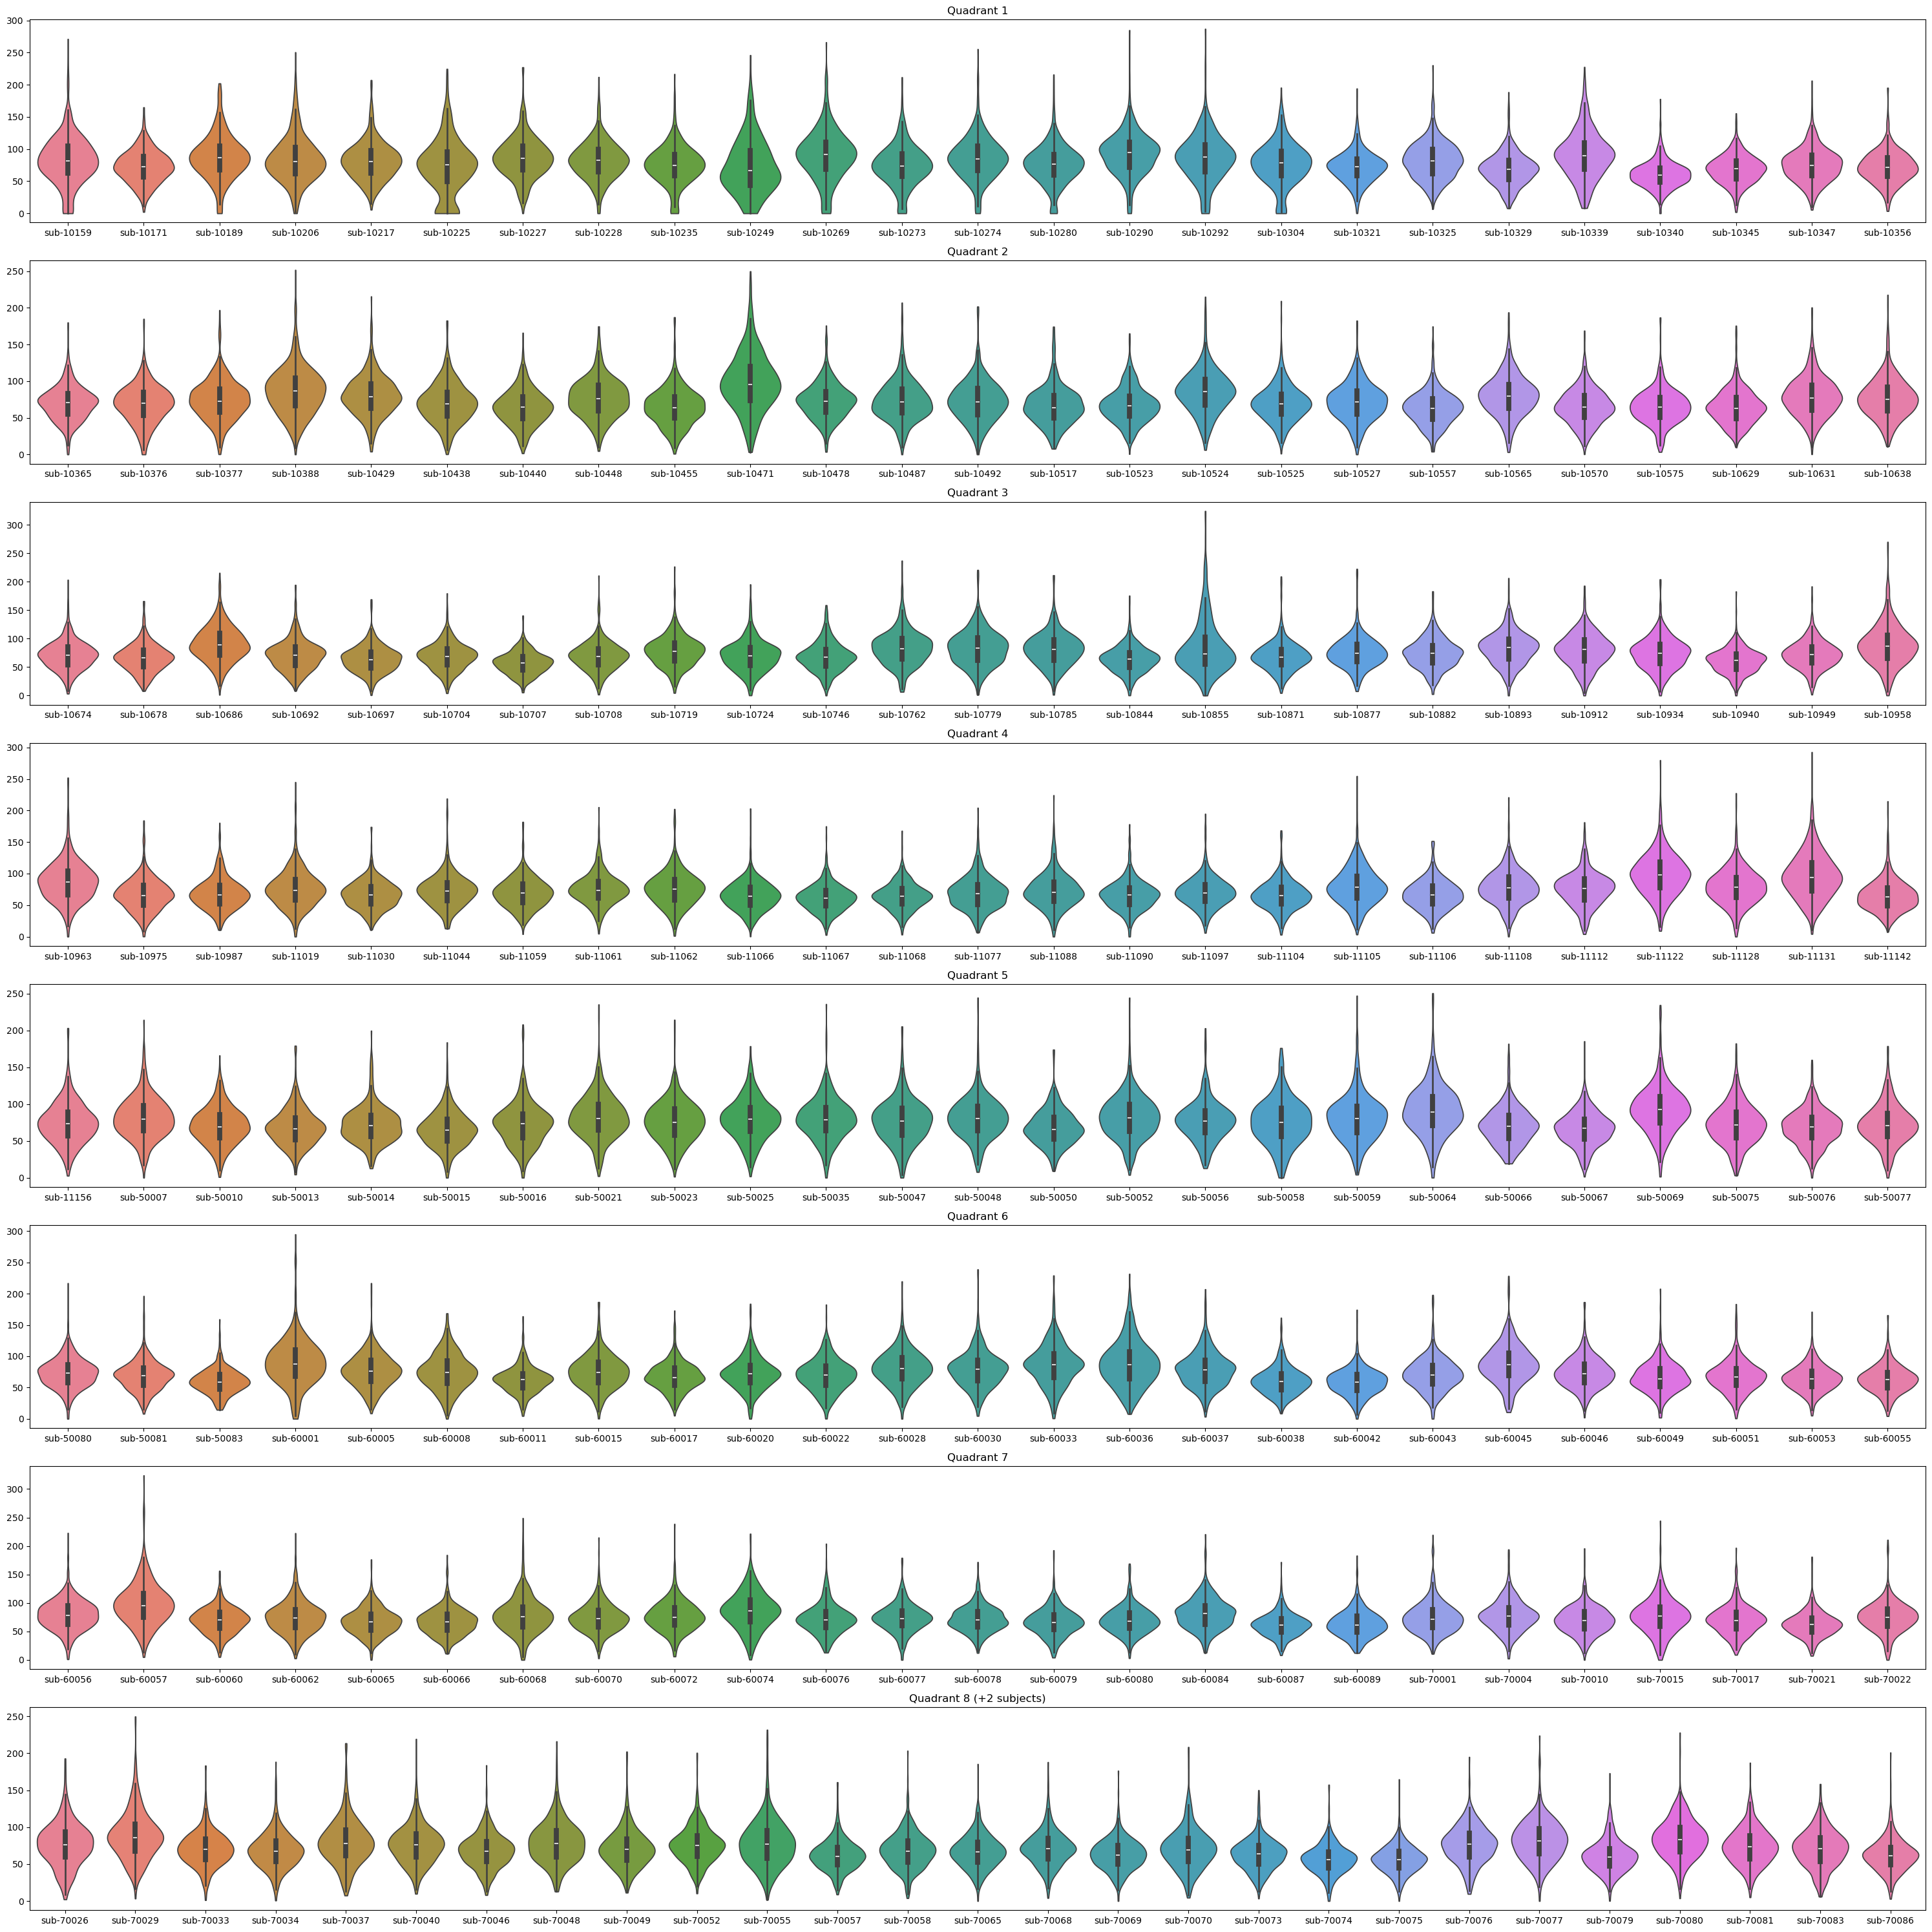

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
vols = pd.read_csv("/home/gabriele.deleonardis/irbio_folder/spreading_dynamics_clinical/derivatives/output_strength_connections.tsv", sep='\t')
vols = vols.set_index('nodes')
vols = vols.reindex(sorted(vols.columns), axis=1)

# Determine the number of subjects and calculate the number of subplots needed
num_subjects = len(vols.columns)
num_subplots = 8
subplots_per_quadrant = num_subjects // num_subplots

# Calculate the number of subjects in the last quadrant
subjects_remaining = num_subjects % num_subplots

# Create subplots for each quadrant
fig, axs = plt.subplots(num_subplots, 1, figsize=(30, 30))

# Plot each quadrant
for i in range(num_subplots - 1):
    start_index = i * subplots_per_quadrant
    end_index = (i + 1) * subplots_per_quadrant
    subset_vols = vols.iloc[:, start_index:end_index]
    ax = sns.violinplot(data=subset_vols, ax=axs[i], cut=0)  # Set cut=0 to align with y=0
    ax.set_title(f'Quadrant {i+1}')

# Plot the remaining subjects in the last subplot
start_index = (num_subplots - 1) * subplots_per_quadrant
subset_vols = vols.iloc[:, start_index:num_subjects]
ax = sns.violinplot(data=subset_vols, ax=axs[num_subplots - 1], cut=0)  # Set cut=0 to align with y=0
ax.set_title(f'Quadrant {num_subplots} (+{subjects_remaining} subjects)')

# Adjust layout
plt.tight_layout()
plt.show()